# Ideal flow problems
This notebook has two parts. First we demonstrate how we can use [SymPy](http://www.sympy.org) to work with the vector and potential fields involved in ideal flows. In the second part we are demonstrating the solution of a problem we would typically present in the PHYS426 Fluid Dynamics class. 

Brief Sympy cheat sheets that may be useful:
* [Mini reference](https://minireference.com/static/tutorials/sympy_tutorial.pdf)
* [Quick examples](https://github.com/sympy/sympy/wiki/Quick-examples)

## Ideal flow
In brief, the flow of fluids can be described in an idealized way if neither viscosity nor turbulence are important, and if the flow is incompressible. There is a narrow range in the Reynolds number $$1000 \leq Re = \frac{v\, l}{\frac{\mu}{\rho}} \leq 2000$$ where this is the case. This regime is called ideal flow, and it most notably breaks down near flow boundaries, such as walls (why?). In this regime both the curl and the divergence of the velocity field vanish: $$\nabla \times \vec{v} = 0$$ and $$\nabla  \vec{v} = 0$$

In [4]:
%pylab nbagg
# initialize sympy
import sympy as sp
sp.init_printing()
# declare sympy variables and functions
x,y,z,t = sp.symbols('x y z t')
u,v = sp.symbols('u v', cls = sp.Function)
u0,v0 = sp.symbols('u0 v0', cls = sp.Function)
Psi,Phi = sp.symbols('Psi Phi', cls = sp.Function)
g,m,a,b = sp.symbols('g m a b')

Populating the interactive namespace from numpy and matplotlib


## Part I
Theory of fluid dynamics shows that in ideal flow conditions we can find velocity fields by finding solutions to Laplace equation $$\Delta \Psi = 0$$ where $\Psi$ is the scalar field defined on the white board.

### Quadratic polynomial solutions

One type of solutions are of quadratic pplynomial form:

In [5]:
A = 1.0
lpsi = lambda x,y: A*x*y

<IPython.core.display.Javascript object>


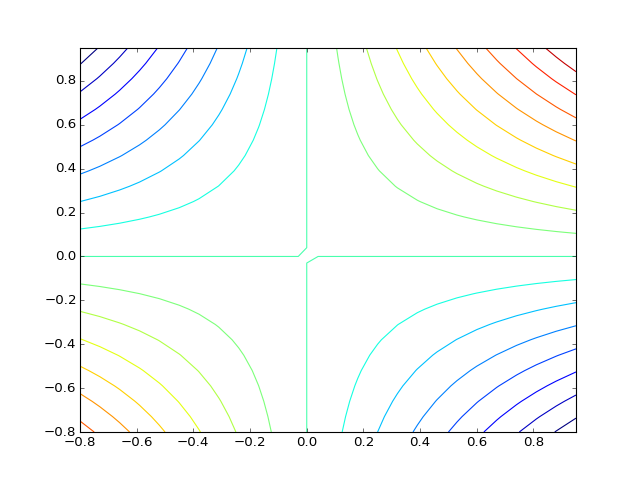

<matplotlib.contour.QuadContourSet instance at 0x113517200>

In [6]:
xx, yy = meshgrid(arange(-0.8, 1, 0.07),arange(-0.8, 1, 0.07))
close(4),figure(4)
contour(xx,yy,lpsi(xx,yy),20)

From the scalar field $\Psi$ we can per definition opf $\Psi$ determine the velocity field, given by
$$  u = \frac{\partial \Psi}{\partial y} \mathrm{\ and\ }  v = - \frac{\partial \Psi}{\partial x}$$
These can be calculated algebraically with Sympy. First, define $\Psi$ in SymPy:

In [18]:
Psi = 2*a*x*y
Psi

Now calculate the velocity components:

In [20]:
u = sp.diff(Psi,y); v = -Psi.diff(x)
u,v

We are dealing with vectors that have special meaning in physics. The `sympy.physics.vector` package is aware of this. In the following `N` is a cartesian reference frame that allows us to work with vector fields and associated scalar potentials.

In [21]:
N = sp.symbols('N', cls = sp.physics.vector.ReferenceFrame)

In this reference frame $N_y$ or `N[1]` stand in for $y$ and `N.x` is the unit component vector $\hat n_x$.

The scalar field for the quadratic polynomial solution of the Laplace equation is then

In [22]:
NPsi=2*a*N[0]*N[1] 
NPsi

with the vector field

In [23]:
V=NPsi.diff(N[1])*N.x - NPsi.diff(N[0])*N.y # velocity vector field
V

As mention already: If the velocity vector field $\vec V(\vec r)$ (or any vector field) is conservative (i.e. has vanishing curl) we can express it in terms of the gradient of a scalar potential: $$\vec V =\nabla \Phi$$

In [24]:
sp.physics.vector.is_conservative(V)

True

In [25]:
Phi = sp.physics.vector.scalar_potential(V,N)
Phi

Of coure the reason why we usually want a scalar potential is that once we have it we can always calculate the corresponding vector field (although in this case we already have it, nevertheless):

In [26]:
sp.physics.vector.gradient(Phi,N)

<IPython.core.display.Javascript object>


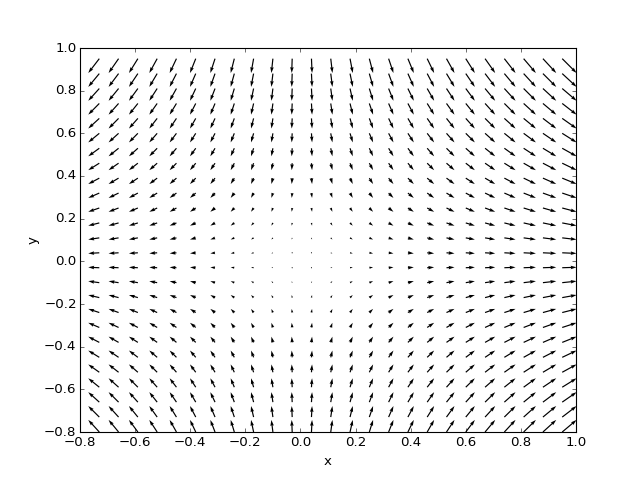

In [27]:
A = 1.
vc = 2*A*xx; uc = -2*A*yy
close(3),figure(3)
quiver(xx,yy,vc,uc)
xlabel('x'); ylabel('y')

In [28]:
Z=N.z
VO=V.cross(Z)  # vector field orthogonal to V
VO

<IPython.core.display.Javascript object>


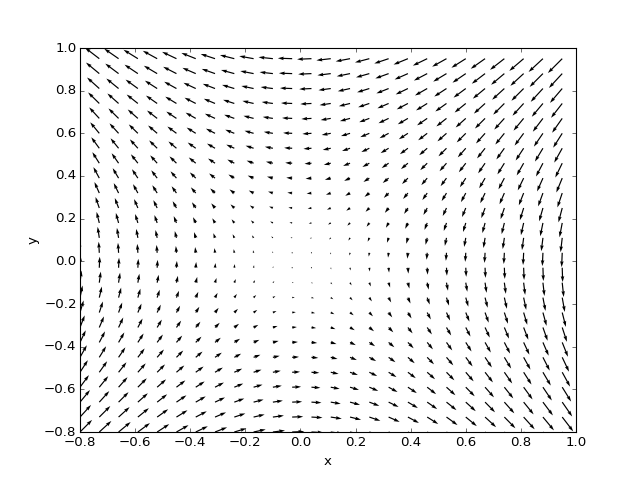

In [29]:
A = 1.
vc = -2*A*yy; uc = -2*A*xx
close(7),figure(7)
quiver(xx,yy,vc,uc)
xlabel('x'); ylabel('y')

## Ideal flow exercise
![Example exercise](./FigIF.png)
In order to solve this problem you just need to know one more thing, which is what a _stagnation point_ is. Maybe you can guess it?

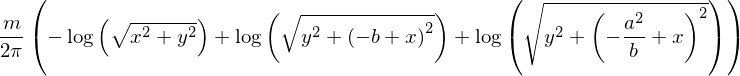

In [7]:
# specify velocity potential
phi=(m/(2*sp.pi))*(sp.ln(sp.sqrt((x-b)**2 + y**2))\
                 +sp.ln(sp.sqrt((x-a**2/b)**2 + y**2))\
                 -sp.ln(sp.sqrt(x**2 + y**2)))
phi

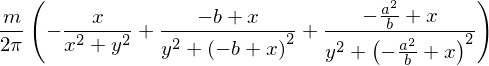

In [8]:
u = sp.diff(phi,x)
u

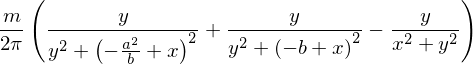

In [9]:
v = sp.diff(phi,y)
v

In [10]:
# put in some numbers
vvv = v.subs({x:1,y:2,m:1.,a:0.75,b:2})
#vvv
vvv.evalf()

## Stagnation points
Because of the symmetry the stagnation points are at $u(y=0) = 0$.

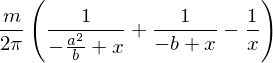

In [11]:
u0 = u.subs(y,0.)
u0

In [12]:
print "The two stagnation points are at ",sp.solve(u0,x)

The two stagnation points are at  [-a, a]


## Sketch the streamlines of the flow
We must evaluate the $u$ and $v$ components of the velocity and plot them.  

In [13]:
# starting the matplotlib engine
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [14]:
# specify parameters
mm = 1
aa = 0.75
bb = 2.
# set up grid
xx = linspace(-2,3,150)
yy = linspace(-1,1,90)

In [15]:
vv = zeros(shape=(len(yy),len(xx)))
uu = copy(vv)

In [16]:
# populating the uu, vv arrays
iy = 0
for this_xx in xx:
    ix = 0
    for this_yy in yy:
        uuu = u.subs({x:this_xx, y:this_yy, a:aa, b:bb, m:mm})
        uu[ix,iy] = uuu.evalf()
        vvv = v.subs({x:this_xx, y:this_yy, a:aa, b:bb, m:mm})
        vv[ix,iy] = vvv.evalf()
        ix += 1
    iy += 1

<IPython.core.display.Javascript object>


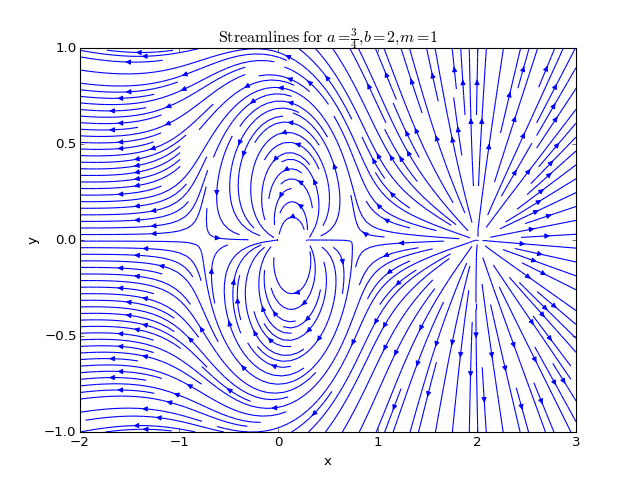

In [17]:
close(1);figure(1)
streamplot(xx,yy,uu,vv,density=2)
xlabel('x'); ylabel('y')
xlim(xx[0],xx[-1]);ylim(yy[0],yy[-1])
title('$\mathrm{Streamlines\ for\ } a = \\frac{3}{4}, b= 2, m = 1$')